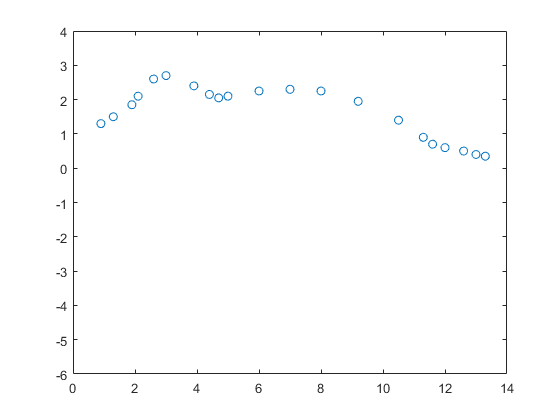

In [3]:
x = [ 0.9 ; 1.3 ; 1.9 ; 2.1 ; 2.6 ; 3.0 ; 3.9 ; 4.4 ; 4.7 ; 5.0 ; 6.0 ; 7.0 ; 8.0 ; 9.2; 10.5; 11.3 ; 11.6; 12.0 ; 12.6 ; 13.0 ; 13.3 ];
y = [ 1.3 ; 1.5 ; 1.85 ; 2.1 ; 2.6 ; 2.7 ; 2.4 ; 2.15 ; 2.05 ; 2.1 ; 2.25 ; 2.3 ; 2.25 ; 1.95 ; 1.4 ; 0.9 ; 0.7 ; 0.6 ; 0.5 ; 0.4 ; 0.35];

dim = size(x);
n = dim(1);

plot(x,y,'o')
ylim([-6 4])

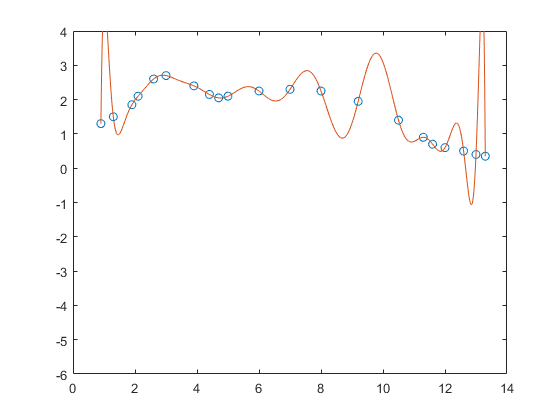

In [13]:
x = [ 0.9 ; 1.3 ; 1.9 ; 2.1 ; 2.6 ; 3.0 ; 3.9 ; 4.4 ; 4.7 ; 5.0 ; 6.0 ; 7.0 ; 8.0 ; 9.2; 10.5; 11.3 ; 11.6; 12.0 ; 12.6 ; 13.0 ; 13.3 ];
y = [ 1.3 ; 1.5 ; 1.85 ; 2.1 ; 2.6 ; 2.7 ; 2.4 ; 2.15 ; 2.05 ; 2.1 ; 2.25 ; 2.3 ; 2.25 ; 1.95 ; 1.4 ; 0.9 ; 0.7 ; 0.6 ; 0.5 ; 0.4 ; 0.35];

dim = size(x);
N = dim(1);

Nt = 1000;
xmin = x(1);
xmax = x(N);
dx = (xmax - xmin) / Nt;

for k = 0:Nt
    xt(k+1) = xmin + k * dx;

    sum = 0.0;
    for i = 1:N
        prod = 1.0;
        for j = 1:N
            if j ~= i
                prod = prod * (xt(k+1)-x(j)) / (x(i)-x(j));
            end;
        end;
        sum = sum + prod * y(i);
    end;
    P(k+1) = sum;
end;

plot(x,y,'o',xt,P)
ylim([-6 4])

In [15]:
x = [ 0.9 ; 1.3 ; 1.9 ; 2.1 ; 2.6 ; 3.0 ; 3.9 ; 4.4 ; 4.7 ; 5.0 ; 6.0 ; 7.0 ; 8.0 ; 9.2; 10.5; 11.3 ; 11.6; 12.0 ; 12.6 ; 13.0 ; 13.3 ];
y = [ 1.3 ; 1.5 ; 1.85 ; 2.1 ; 2.6 ; 2.7 ; 2.4 ; 2.15 ; 2.05 ; 2.1 ; 2.25 ; 2.3 ; 2.25 ; 1.95 ; 1.4 ; 0.9 ; 0.7 ; 0.6 ; 0.5 ; 0.4 ; 0.35];

dim = size(x);
N = dim(1);

Nt = 1000;
xmin = x(1);
xmax = x(N);
dx = (xmax - xmin) / Nt;

% Interpolasi Lagranga
for k = 0:Nt
    xt(k+1) = xmin + k * dx;

    sum = 0.0;
    for i = 1:N
        prod = 1.0;
        for j = 1:N
            if j ~= i
                prod = prod * (xt(k+1)-x(j)) / (x(i)-x(j));
            end;
        end;
        sum = sum + prod * y(i);
    end;
    Plag(k+1) = sum;
end;

% Interpolasi Spline Cubic

% Pertama, cari koefisien a_j
for j = 1:N
    a(j) = y(j);
end;

% Kemudian, tentukan setiap lebar h_j
for j = 1:N-1
    h(j) = x(j+1) - x(j);
end;

% Cari koefisien c_j dengan menyelesaikan
% sistem persamaan linear Ax = b
A = eye(N,N);

B(1) = 0.0;
for i = 2:N-1
    A(i,i) = 2 * (h(i-1) + h(i)); % Diagonal utama
    A(i, i+1) = h(i); % Diagonal di atas diagonal utama
    A(i,i-1) = h(i-1); % Diagonal di bawah diagonal utama
    
    B(i) = (3 * (a(i+1) - a(i)) / h(i)) - (3 * (a(i) - a(i-1)) / h(i-1)) 
end;
B(N) = 0.0;

c = elgauss(A,B);

for j = 1:N-1
    b(j) = (a(j+1) - a(j)) / h(j) - h(j) * (2 * c(j) + c(j+1)) / 3
    d(j) = (c(j+1) - c(j)) / (3*h(j));
end;

for k = 0:Nt
    xt(k+1) = xmin + k*dx;
    for j = 1:n-1
        if xt(k+1) >= x(j) * xt(k+1) <= x(j+1)
            S(k+1) = a(j) + b(j) * (xt(k+1) - x(j)) + c(j) * (xt(k+1) - x(j))^2 + d(j) * (xt(k+1) - x(j))^3
        end;
    end;
end;


plot(x,y,'o',xt,P,'r',xt,S,'g')
ylim([-6 4])


  File C:\Users\user\Documents\MATLAB\lectures\elgauss.m, line 18, in elgauss
Index exceeds matrix dimensions.

